In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']   #中文
mpl.rcParams['axes.unicode_minus']=False     #负号

import os

from os import path
from wordcloud import WordCloud

In [71]:
df1 = pd.read_csv(open('qiancheng_data.csv'))

In [72]:
df1

title       company_name  \
0                                         Python开发工程师   联合永道（上海）信息技术有限公司   
1                                     Python实习-机器学习方向   寰宇优才教育科技（北京）有限公司   
2                                         Python开发工程师     北京万维盈创科技发展有限公司   
3                                         Python开发工程师         北京学神科技有限公司   
4     Python研发负责人(001066)\t\t\t\t(职位编号：rong360001066)     北京融联世纪信息技术有限公司   
5                                       全栈python开发工程师       北京道冲泰科科技有限公司   
6                                       Python高级开发工程师     叠云（北京）科技股份有限公司   
7                                       Python高级开发工程师         南京高泰科技有限公司   
8                                    Python开发工程师(石家庄）         北京慧铭软件有限公司   
9                                      Python开发工程师-ZH     北京四维图新科技股份有限公司   
10                                        Python开发工程师  中国广视索福瑞媒介研究有限责任公司   
11                                      Python高级开发工程师       北京棣南新宇科技有限公司   
12                              云平台开发工程师（JAVA、Python）     航天星图科技（北京）有限公司   
13                  高级Python开发工程师\t\t\t\t(职位编号：16449)        奇虎360科技有限公司   
14                                           Python讲师       北京童程童美科技有限公司   
15             Software Engineer  Python, Java, Cloud     贵州华芯通半导体技术有限公司   
16                                  Python开发工程师（产品研发）       北京东方金信科技有限公司   
17                                      Python高级开发工程师        北京量子保科技有限公司   
18                            Python开发工程师(面向2018届毕业生)     江森自控（中国）投资有限公司   
19                                        Python软件工程师       上海高重信息科技有限公司   
20                                     Python 后台开发工程师         北京推题科技有限公司   
21                                      Python高级开发工程师       北京微聚万家科技有限公司   
22                                      python高级开发工程师     北京博学慎思教育科技有限公司   
23                                        Python开发工程师     慧影医疗科技（北京）有限公司   
24                                    Python后端高级开发工程师     武汉皮皮外语网络科技有限公司   
25                      高级Linux工程师（c/c++ 、php、python）   北京安德信业信息咨询有限责任公司   
26                                      Python高级研发工程师      北京好巧国际旅行社有限公司   
27                                        python研发工程师         颉一软件科技有限公司   
28                                        Python开发工程师   融信在线（北京）教育科技有限公司   
29                                        Python开发工程师     北京永信至诚科技股份有限公司   
...                                               ...                ...   
5711                                          后端测试工程师   软通动力信息技术（集团）有限公司   
5712                                         PHP开发工程师   软通动力信息技术（集团）有限公司   
5713                                      ETL开发（Java）   软通动力信息技术（集团）有限公司   
5714                                            实施工程师   软通动力信息技术（集团）有限公司   
5715                                          高级软件工程师   软通动力信息技术（集团）有限公司   
5716                                 测试工程师-赴今日头条（懂车帝）   软通动力信息技术（集团）有限公司   
5717                                  高级算法研究员（医疗影像方向）         上海泽恩实业有限公司   
5718               资深算法工程师\t\t\t\t(职位编号：BJ2018060092)         上海泽恩实业有限公司   
5719           自然语言处理数据科学家\t\t\t\t(职位编号：BJ2018060074)         上海泽恩实业有限公司   
5720      算法工程师（机器学习/深度学习）\t\t\t\t(职位编号：BJ2017060073)         上海泽恩实业有限公司   
5721      技术总监（算法）/资深算法工程师\t\t\t\t(职位编号：BJ2017060070)         上海泽恩实业有限公司   
5722         高级算法工程师（医学影像）\t\t\t\t(职位编号：BJ2017060050)         上海泽恩实业有限公司   
5723               大数据开发经理\t\t\t\t(职位编号：BJ2017060022)         上海泽恩实业有限公司   
5724             资深机器学习研究员\t\t\t\t(职位编号：BJ2017040006)         上海泽恩实业有限公司   
5725                                        测试工程师-赴头条   软通动力信息技术（集团）有限公司   
5726                                      测试工程师-赴今日头条   软通动力信息技术（集团）有限公司   
5727                                          安卓测试工程师   软通动力信息技术（集团）有限公司   
5728                                             Java   软通动力信息技术（集团）有限公司   
5729                                         视觉感知产品经理   软通动力信息技术（集团）有限公司   
5730                                          安全运维工程师       阳光保险集团股份有限公司   
5731                                          主机安全工程师       阳光保险集团股份有限公司   
5732                

In [73]:
df2 = df1[df1['salary'].notnull()] #
df2

title       company_name  \
0                                         Python开发工程师   联合永道（上海）信息技术有限公司   
1                                     Python实习-机器学习方向   寰宇优才教育科技（北京）有限公司   
2                                         Python开发工程师     北京万维盈创科技发展有限公司   
3                                         Python开发工程师         北京学神科技有限公司   
4     Python研发负责人(001066)\t\t\t\t(职位编号：rong360001066)     北京融联世纪信息技术有限公司   
5                                       全栈python开发工程师       北京道冲泰科科技有限公司   
6                                       Python高级开发工程师     叠云（北京）科技股份有限公司   
7                                       Python高级开发工程师         南京高泰科技有限公司   
8                                    Python开发工程师(石家庄）         北京慧铭软件有限公司   
9                                      Python开发工程师-ZH     北京四维图新科技股份有限公司   
10                                        Python开发工程师  中国广视索福瑞媒介研究有限责任公司   
11                                      Python高级开发工程师       北京棣南新宇科技有限公司   
12                              云平台开发工程师（JAVA、Python）     航天星图科技（北京）有限公司   
14                                           Python讲师       北京童程童美科技有限公司   
15             Software Engineer  Python, Java, Cloud     贵州华芯通半导体技术有限公司   
16                                  Python开发工程师（产品研发）       北京东方金信科技有限公司   
17                                      Python高级开发工程师        北京量子保科技有限公司   
18                            Python开发工程师(面向2018届毕业生)     江森自控（中国）投资有限公司   
19                                        Python软件工程师       上海高重信息科技有限公司   
20                                     Python 后台开发工程师         北京推题科技有限公司   
21                                      Python高级开发工程师       北京微聚万家科技有限公司   
22                                      python高级开发工程师     北京博学慎思教育科技有限公司   
23                                        Python开发工程师     慧影医疗科技（北京）有限公司   
24                                    Python后端高级开发工程师     武汉皮皮外语网络科技有限公司   
25                      高级Linux工程师（c/c++ 、php、python）   北京安德信业信息咨询有限责任公司   
26                                      Python高级研发工程师      北京好巧国际旅行社有限公司   
27                                        python研发工程师         颉一软件科技有限公司   
28                                        Python开发工程师   融信在线（北京）教育科技有限公司   
29                                        Python开发工程师     北京永信至诚科技股份有限公司   
30                                           Python讲师       北京智联友道科技有限公司   
...                                               ...                ...   
5711                                          后端测试工程师   软通动力信息技术（集团）有限公司   
5712                                         PHP开发工程师   软通动力信息技术（集团）有限公司   
5713                                      ETL开发（Java）   软通动力信息技术（集团）有限公司   
5714                                            实施工程师   软通动力信息技术（集团）有限公司   
5715                                          高级软件工程师   软通动力信息技术（集团）有限公司   
5716                                 测试工程师-赴今日头条（懂车帝）   软通动力信息技术（集团）有限公司   
5717                                  高级算法研究员（医疗影像方向）         上海泽恩实业有限公司   
5718               资深算法工程师\t\t\t\t(职位编号：BJ2018060092)         上海泽恩实业有限公司   
5719           自然语言处理数据科学家\t\t\t\t(职位编号：BJ2018060074)         上海泽恩实业有限公司   
5720      算法工程师（机器学习/深度学习）\t\t\t\t(职位编号：BJ2017060073)         上海泽恩实业有限公司   
5721      技术总监（算法）/资深算法工程师\t\t\t\t(职位编号：BJ2017060070)         上海泽恩实业有限公司   
5722         高级算法工程师（医学影像）\t\t\t\t(职位编号：BJ2017060050)         上海泽恩实业有限公司   
5723               大数据开发经理\t\t\t\t(职位编号：BJ2017060022)         上海泽恩实业有限公司   
5724             资深机器学习研究员\t\t\t\t(职位编号：BJ2017040006)         上海泽恩实业有限公司   
5725                                        测试工程师-赴头条   软通动力信息技术（集团）有限公司   
5726                                      测试工程师-赴今日头条   软通动力信息技术（集团）有限公司   
5727                                          安卓测试工程师   软通动力信息技术（集团）有限公司   
5728                                             Java   软通动力信息技术（集团）有限公司   
5729                                         视觉感知产品经理   软通动力信息技术（集团）有限公司   
5730                                          安全运维工程师       阳光保险集团股份有限公司   
5731                                          主机安全工程师       阳光保险集团股份有限公司   
5732                

In [74]:
def new_int(data_list):
    return_list = [float(i) for i in data_list]
    return return_list

def salary_new(df,sa):
    data1 = df[sa]
    
    
    
    if '万/月' in data1 or '万以下/年' in data1:
        data1 = data1.replace('万/月','').replace('万以下/年','').split('-')
        data1 = new_int(data1)
        return_data = sum(data1)/len(data1)
    elif '千/月' in data1 or '千以下/月' in data1:
        data1 = data1.replace('千/月','').replace('千以下/月','').split('-')
        data1 = new_int(data1)
        return_data = sum(data1)/len(data1)/10
    elif '元/小时' in data1:
        data1 = data1.replace('元/小时','').split('-')
        data1 = new_int(data1)
        print(data1)
        print(type(data1))
        return_data = sum(data1)/len(data1)*8*30/10000
    elif '万/年' in data1:
        data1 = data1.replace('万/年','').split('-')
        data1 = new_int(data1)
        return_data = sum(data1)/len(data1)/12
    elif '元/天' in data1:
        data1 = data1.replace('元/天','').split('-')
        data1 = new_int(data1)
        return_data = sum(data1)/len(data1)*30/10000
    return return_data

In [75]:
df2['salary'] = df2.apply(salary_new,axis = 1,sa = 'salary')

[25.0]
<class 'list'>


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
df2


title       company_name  \
0                                         Python开发工程师   联合永道（上海）信息技术有限公司   
1                                     Python实习-机器学习方向   寰宇优才教育科技（北京）有限公司   
2                                         Python开发工程师     北京万维盈创科技发展有限公司   
3                                         Python开发工程师         北京学神科技有限公司   
4     Python研发负责人(001066)\t\t\t\t(职位编号：rong360001066)     北京融联世纪信息技术有限公司   
5                                       全栈python开发工程师       北京道冲泰科科技有限公司   
6                                       Python高级开发工程师     叠云（北京）科技股份有限公司   
7                                       Python高级开发工程师         南京高泰科技有限公司   
8                                    Python开发工程师(石家庄）         北京慧铭软件有限公司   
9                                      Python开发工程师-ZH     北京四维图新科技股份有限公司   
10                                        Python开发工程师  中国广视索福瑞媒介研究有限责任公司   
11                                      Python高级开发工程师       北京棣南新宇科技有限公司   
12                              云平台开发工程师（JAVA、Python）     航天星图科技（北京）有限公司   
14                                           Python讲师       北京童程童美科技有限公司   
15             Software Engineer  Python, Java, Cloud     贵州华芯通半导体技术有限公司   
16                                  Python开发工程师（产品研发）       北京东方金信科技有限公司   
17                                      Python高级开发工程师        北京量子保科技有限公司   
18                            Python开发工程师(面向2018届毕业生)     江森自控（中国）投资有限公司   
19                                        Python软件工程师       上海高重信息科技有限公司   
20                                     Python 后台开发工程师         北京推题科技有限公司   
21                                      Python高级开发工程师       北京微聚万家科技有限公司   
22                                      python高级开发工程师     北京博学慎思教育科技有限公司   
23                                        Python开发工程师     慧影医疗科技（北京）有限公司   
24                                    Python后端高级开发工程师     武汉皮皮外语网络科技有限公司   
25                      高级Linux工程师（c/c++ 、php、python）   北京安德信业信息咨询有限责任公司   
26                                      Python高级研发工程师      北京好巧国际旅行社有限公司   
27                                        python研发工程师         颉一软件科技有限公司   
28                                        Python开发工程师   融信在线（北京）教育科技有限公司   
29                                        Python开发工程师     北京永信至诚科技股份有限公司   
30                                           Python讲师       北京智联友道科技有限公司   
...                                               ...                ...   
5711                                          后端测试工程师   软通动力信息技术（集团）有限公司   
5712                                         PHP开发工程师   软通动力信息技术（集团）有限公司   
5713                                      ETL开发（Java）   软通动力信息技术（集团）有限公司   
5714                                            实施工程师   软通动力信息技术（集团）有限公司   
5715                                          高级软件工程师   软通动力信息技术（集团）有限公司   
5716                                 测试工程师-赴今日头条（懂车帝）   软通动力信息技术（集团）有限公司   
5717                                  高级算法研究员（医疗影像方向）         上海泽恩实业有限公司   
5718               资深算法工程师\t\t\t\t(职位编号：BJ2018060092)         上海泽恩实业有限公司   
5719           自然语言处理数据科学家\t\t\t\t(职位编号：BJ2018060074)         上海泽恩实业有限公司   
5720      算法工程师（机器学习/深度学习）\t\t\t\t(职位编号：BJ2017060073)         上海泽恩实业有限公司   
5721      技术总监（算法）/资深算法工程师\t\t\t\t(职位编号：BJ2017060070)         上海泽恩实业有限公司   
5722         高级算法工程师（医学影像）\t\t\t\t(职位编号：BJ2017060050)         上海泽恩实业有限公司   
5723               大数据开发经理\t\t\t\t(职位编号：BJ2017060022)         上海泽恩实业有限公司   
5724             资深机器学习研究员\t\t\t\t(职位编号：BJ2017040006)         上海泽恩实业有限公司   
5725                                        测试工程师-赴头条   软通动力信息技术（集团）有限公司   
5726                                      测试工程师-赴今日头条   软通动力信息技术（集团）有限公司   
5727                                          安卓测试工程师   软通动力信息技术（集团）有限公司   
5728                                             Java   软通动力信息技术（集团）有限公司   
5729                                         视觉感知产品经理   软通动力信息技术（集团）有限公司   
5730                                          安全运维工程师       阳光保险集团股份有限公司   
5731                                          主机安全工程师       阳光保险集团股份有限公司   
5732                

# 薪资分布?

In [77]:
xz_fb = list(df2['salary'].value_counts().index.sort_values())

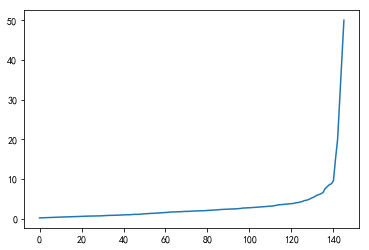

In [78]:
plt.plot(xz_fb)

# 那些地区提供的岗位比较多?

In [79]:
def company_new(df,x):
    new_data = df[x].split('-')                #清洗地区数据
    if '北京' in new_data:
        if len(new_data) == 1:
            return_data = new_data[0]
        else:
            return_data = new_data[1]
    else:
        return_data = np.nan
    return return_data


In [80]:
df2 = df2[df2['company_site'].notnull()]

In [81]:
df2['company_site'] = df2.apply(company_new,axis = 1,x = 'company_site')
df2

title       company_name  \
0                                         Python开发工程师   联合永道（上海）信息技术有限公司   
1                                     Python实习-机器学习方向   寰宇优才教育科技（北京）有限公司   
2                                         Python开发工程师     北京万维盈创科技发展有限公司   
3                                         Python开发工程师         北京学神科技有限公司   
4     Python研发负责人(001066)\t\t\t\t(职位编号：rong360001066)     北京融联世纪信息技术有限公司   
5                                       全栈python开发工程师       北京道冲泰科科技有限公司   
6                                       Python高级开发工程师     叠云（北京）科技股份有限公司   
7                                       Python高级开发工程师         南京高泰科技有限公司   
8                                    Python开发工程师(石家庄）         北京慧铭软件有限公司   
9                                      Python开发工程师-ZH     北京四维图新科技股份有限公司   
10                                        Python开发工程师  中国广视索福瑞媒介研究有限责任公司   
11                                      Python高级开发工程师       北京棣南新宇科技有限公司   
12                              云平台开发工程师（JAVA、Python）     航天星图科技（北京）有限公司   
14                                           Python讲师       北京童程童美科技有限公司   
15             Software Engineer  Python, Java, Cloud     贵州华芯通半导体技术有限公司   
16                                  Python开发工程师（产品研发）       北京东方金信科技有限公司   
17                                      Python高级开发工程师        北京量子保科技有限公司   
18                            Python开发工程师(面向2018届毕业生)     江森自控（中国）投资有限公司   
19                                        Python软件工程师       上海高重信息科技有限公司   
20                                     Python 后台开发工程师         北京推题科技有限公司   
21                                      Python高级开发工程师       北京微聚万家科技有限公司   
22                                      python高级开发工程师     北京博学慎思教育科技有限公司   
23                                        Python开发工程师     慧影医疗科技（北京）有限公司   
24                                    Python后端高级开发工程师     武汉皮皮外语网络科技有限公司   
25                      高级Linux工程师（c/c++ 、php、python）   北京安德信业信息咨询有限责任公司   
26                                      Python高级研发工程师      北京好巧国际旅行社有限公司   
27                                        python研发工程师         颉一软件科技有限公司   
28                                        Python开发工程师   融信在线（北京）教育科技有限公司   
29                                        Python开发工程师     北京永信至诚科技股份有限公司   
30                                           Python讲师       北京智联友道科技有限公司   
...                                               ...                ...   
5711                                          后端测试工程师   软通动力信息技术（集团）有限公司   
5712                                         PHP开发工程师   软通动力信息技术（集团）有限公司   
5713                                      ETL开发（Java）   软通动力信息技术（集团）有限公司   
5714                                            实施工程师   软通动力信息技术（集团）有限公司   
5715                                          高级软件工程师   软通动力信息技术（集团）有限公司   
5716                                 测试工程师-赴今日头条（懂车帝）   软通动力信息技术（集团）有限公司   
5717                                  高级算法研究员（医疗影像方向）         上海泽恩实业有限公司   
5718               资深算法工程师\t\t\t\t(职位编号：BJ2018060092)         上海泽恩实业有限公司   
5719           自然语言处理数据科学家\t\t\t\t(职位编号：BJ2018060074)         上海泽恩实业有限公司   
5720      算法工程师（机器学习/深度学习）\t\t\t\t(职位编号：BJ2017060073)         上海泽恩实业有限公司   
5721      技术总监（算法）/资深算法工程师\t\t\t\t(职位编号：BJ2017060070)         上海泽恩实业有限公司   
5722         高级算法工程师（医学影像）\t\t\t\t(职位编号：BJ2017060050)         上海泽恩实业有限公司   
5723               大数据开发经理\t\t\t\t(职位编号：BJ2017060022)         上海泽恩实业有限公司   
5724             资深机器学习研究员\t\t\t\t(职位编号：BJ2017040006)         上海泽恩实业有限公司   
5725                                        测试工程师-赴头条   软通动力信息技术（集团）有限公司   
5726                                      测试工程师-赴今日头条   软通动力信息技术（集团）有限公司   
5727                                          安卓测试工程师   软通动力信息技术（集团）有限公司   
5728                                             Java   软通动力信息技术（集团）有限公司   
5729                                         视觉感知产品经理   软通动力信息技术（集团）有限公司   
5730                                          安全运维工程师       阳光保险集团股份有限公司   
5731                                          主机安全工程师       阳光保险集团股份有限公司   
5732                

In [82]:
s = df2['company_site'].value_counts()
s

海淀区     1712
北京      1443
朝阳区     1046
西城区      174
昌平区      164
丰台区      126
东城区      126
大兴区      108
石景山区      41
通州区       23
顺义区       20
房山区       19
门头沟区       3
延庆区        2
Name: company_site, dtype: int64

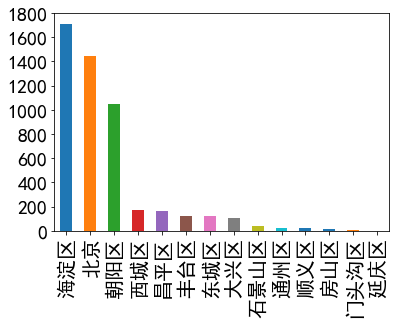

In [37]:
s.plot.bar(fontsize = 20,)

# 工作年限要求?

In [15]:
# ss = pd.pivot_table(df2,index = ['company_site'],values=["title"],columns = ['experience_required'],aggfunc = 'count',fill_value = 0)
# ss.plot.bar(width = 100)

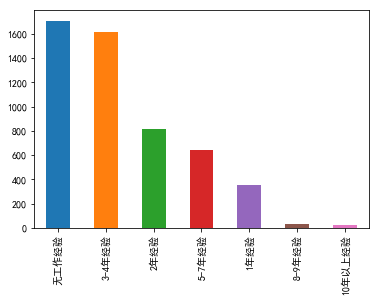

In [38]:
df2['experience_required'].value_counts().plot.bar()

# 需要的技能

In [41]:
def word(path):
    d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    text = open(path).read()
    plt.figure(figsize = (15,8))
    wordcloud = WordCloud(font_path='./fonts/simhei.ttf',background_color = 'white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

In [39]:
with open('job_info.txt','a') as f:
    df1['job_info'].apply(lambda x:f.write(x.replace('岗位职责','').replace('岗位要求','').replace('任职要求','')
                                           .replace('任职资格','').replace('工作职责','').replace('xa0','')))

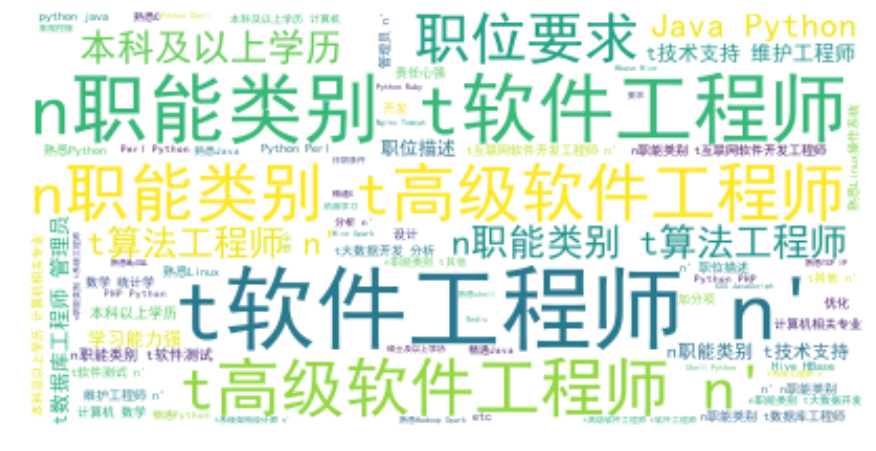

In [42]:
word(path = 'job_info.txt')

# 公司一般会提供什么福利诱惑?

In [43]:
with open('company_welfare.txt','a') as f:
    df1['company_welfare'].apply(lambda x:f.write(x))

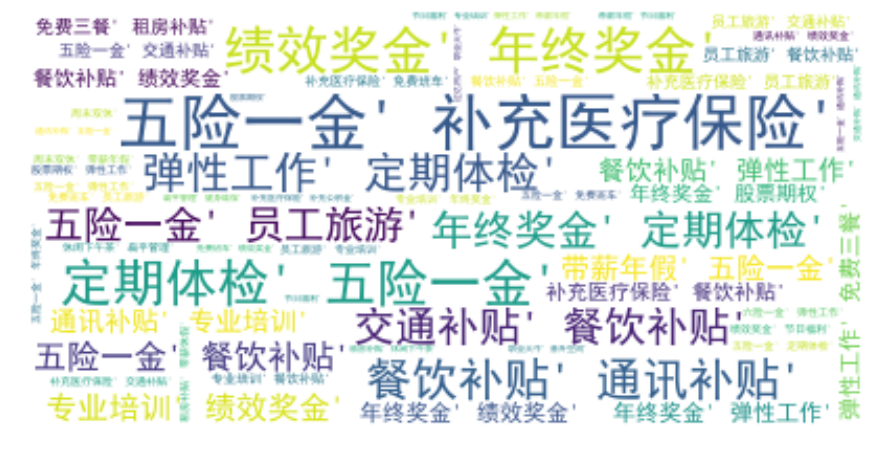

In [44]:
word(path = 'company_welfare.txt')

# 薪资和地区的关系

In [45]:
xz = pd.pivot_table(df2,index = ['company_site'],values=["salary"],aggfunc='mean')

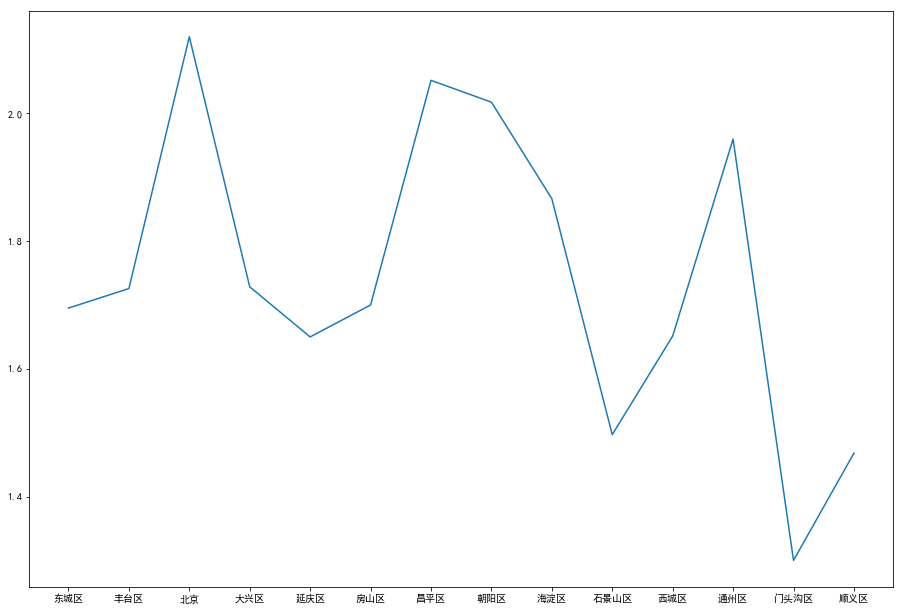

In [46]:

plt.axes([1,0,2,2])
plt.plot(xz)

# 薪资和工作年限的关系

In [47]:
xz_g = pd.pivot_table(df2,index = ['experience_required'],values=["salary"],aggfunc='mean').sort_values('salary')

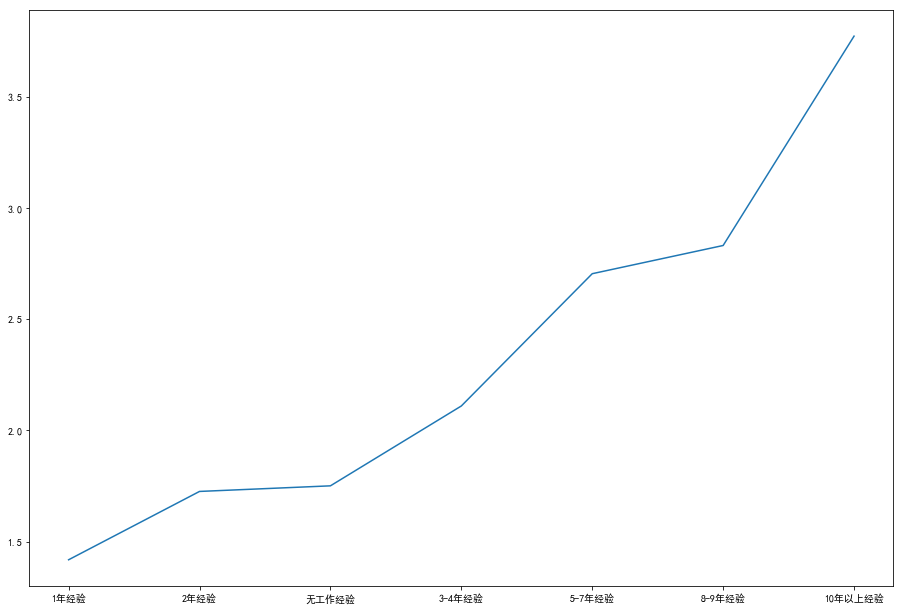

In [48]:
plt.axes([1,0,2,2])
plt.plot(xz_g)

# 学历要求

In [66]:
df2

title       company_name  \
0                                         Python开发工程师   联合永道（上海）信息技术有限公司   
1                                     Python实习-机器学习方向   寰宇优才教育科技（北京）有限公司   
2                                         Python开发工程师     北京万维盈创科技发展有限公司   
3                                         Python开发工程师         北京学神科技有限公司   
4     Python研发负责人(001066)\t\t\t\t(职位编号：rong360001066)     北京融联世纪信息技术有限公司   
5                                       全栈python开发工程师       北京道冲泰科科技有限公司   
6                                       Python高级开发工程师     叠云（北京）科技股份有限公司   
7                                       Python高级开发工程师         南京高泰科技有限公司   
9                                      Python开发工程师-ZH     北京四维图新科技股份有限公司   
10                                        Python开发工程师  中国广视索福瑞媒介研究有限责任公司   
11                                      Python高级开发工程师       北京棣南新宇科技有限公司   
12                              云平台开发工程师（JAVA、Python）     航天星图科技（北京）有限公司   
14                                           Python讲师       北京童程童美科技有限公司   
15             Software Engineer  Python, Java, Cloud     贵州华芯通半导体技术有限公司   
16                                  Python开发工程师（产品研发）       北京东方金信科技有限公司   
17                                      Python高级开发工程师        北京量子保科技有限公司   
18                            Python开发工程师(面向2018届毕业生)     江森自控（中国）投资有限公司   
19                                        Python软件工程师       上海高重信息科技有限公司   
20                                     Python 后台开发工程师         北京推题科技有限公司   
21                                      Python高级开发工程师       北京微聚万家科技有限公司   
22                                      python高级开发工程师     北京博学慎思教育科技有限公司   
23                                        Python开发工程师     慧影医疗科技（北京）有限公司   
24                                    Python后端高级开发工程师     武汉皮皮外语网络科技有限公司   
25                      高级Linux工程师（c/c++ 、php、python）   北京安德信业信息咨询有限责任公司   
26                                      Python高级研发工程师      北京好巧国际旅行社有限公司   
27                                        python研发工程师         颉一软件科技有限公司   
28                                        Python开发工程师   融信在线（北京）教育科技有限公司   
29                                        Python开发工程师     北京永信至诚科技股份有限公司   
30                                           Python讲师       北京智联友道科技有限公司   
31                                        Python软件工程师             北京四中网校   
...                                               ...                ...   
5711                                          后端测试工程师   软通动力信息技术（集团）有限公司   
5712                                         PHP开发工程师   软通动力信息技术（集团）有限公司   
5713                                      ETL开发（Java）   软通动力信息技术（集团）有限公司   
5714                                            实施工程师   软通动力信息技术（集团）有限公司   
5715                                          高级软件工程师   软通动力信息技术（集团）有限公司   
5716                                 测试工程师-赴今日头条（懂车帝）   软通动力信息技术（集团）有限公司   
5717                                  高级算法研究员（医疗影像方向）         上海泽恩实业有限公司   
5718               资深算法工程师\t\t\t\t(职位编号：BJ2018060092)         上海泽恩实业有限公司   
5719           自然语言处理数据科学家\t\t\t\t(职位编号：BJ2018060074)         上海泽恩实业有限公司   
5720      算法工程师（机器学习/深度学习）\t\t\t\t(职位编号：BJ2017060073)         上海泽恩实业有限公司   
5721      技术总监（算法）/资深算法工程师\t\t\t\t(职位编号：BJ2017060070)         上海泽恩实业有限公司   
5722         高级算法工程师（医学影像）\t\t\t\t(职位编号：BJ2017060050)         上海泽恩实业有限公司   
5723               大数据开发经理\t\t\t\t(职位编号：BJ2017060022)         上海泽恩实业有限公司   
5724             资深机器学习研究员\t\t\t\t(职位编号：BJ2017040006)         上海泽恩实业有限公司   
5725                                        测试工程师-赴头条   软通动力信息技术（集团）有限公司   
5726                                      测试工程师-赴今日头条   软通动力信息技术（集团）有限公司   
5727                                          安卓测试工程师   软通动力信息技术（集团）有限公司   
5728                                             Java   软通动力信息技术（集团）有限公司   
5729                                         视觉感知产品经理   软通动力信息技术（集团）有限公司   
5730                                          安全运维工程师       阳光保险集团股份有限公司   
5731                                          主机安全工程师       阳光保险集团股份有限公司   
5732                

In [50]:
df2['edu_required'].value_counts()

本科       3347
大专        464
硕士        435
招1人       320
招若干人      258
招2人       179
招3人        54
招5人        44
招10人       23
招4人        23
博士         17
招6人        10
中专          5
初中及以下       3
招50人        2
招8人         1
招15人        1
招12人        1
Name: edu_required, dtype: int64

In [51]:
def edu_required_new(df,edu):
    data1 = df[edu]
    if '招' in data1:
        data1 = '初中及以下'
    return data1

In [52]:
df2['edu_required'] = df2.apply(edu_required_new,axis = 1,edu = 'edu_required')

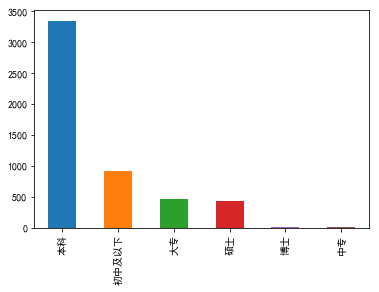

In [53]:
df2['edu_required'].value_counts().plot.bar()

In [55]:
df2 = df2[df2['company_site'].notnull()]

In [67]:
df2.to_csv('new_data.csv',index = None)

In [61]:
columns = list(df2.columns)

In [63]:
columns[2] = 'salary(万/月)'

In [64]:
df2.columns = columns

In [65]:
df2

title       company_name  \
0                                         Python开发工程师   联合永道（上海）信息技术有限公司   
1                                     Python实习-机器学习方向   寰宇优才教育科技（北京）有限公司   
2                                         Python开发工程师     北京万维盈创科技发展有限公司   
3                                         Python开发工程师         北京学神科技有限公司   
4     Python研发负责人(001066)\t\t\t\t(职位编号：rong360001066)     北京融联世纪信息技术有限公司   
5                                       全栈python开发工程师       北京道冲泰科科技有限公司   
6                                       Python高级开发工程师     叠云（北京）科技股份有限公司   
7                                       Python高级开发工程师         南京高泰科技有限公司   
9                                      Python开发工程师-ZH     北京四维图新科技股份有限公司   
10                                        Python开发工程师  中国广视索福瑞媒介研究有限责任公司   
11                                      Python高级开发工程师       北京棣南新宇科技有限公司   
12                              云平台开发工程师（JAVA、Python）     航天星图科技（北京）有限公司   
14                                           Python讲师       北京童程童美科技有限公司   
15             Software Engineer  Python, Java, Cloud     贵州华芯通半导体技术有限公司   
16                                  Python开发工程师（产品研发）       北京东方金信科技有限公司   
17                                      Python高级开发工程师        北京量子保科技有限公司   
18                            Python开发工程师(面向2018届毕业生)     江森自控（中国）投资有限公司   
19                                        Python软件工程师       上海高重信息科技有限公司   
20                                     Python 后台开发工程师         北京推题科技有限公司   
21                                      Python高级开发工程师       北京微聚万家科技有限公司   
22                                      python高级开发工程师     北京博学慎思教育科技有限公司   
23                                        Python开发工程师     慧影医疗科技（北京）有限公司   
24                                    Python后端高级开发工程师     武汉皮皮外语网络科技有限公司   
25                      高级Linux工程师（c/c++ 、php、python）   北京安德信业信息咨询有限责任公司   
26                                      Python高级研发工程师      北京好巧国际旅行社有限公司   
27                                        python研发工程师         颉一软件科技有限公司   
28                                        Python开发工程师   融信在线（北京）教育科技有限公司   
29                                        Python开发工程师     北京永信至诚科技股份有限公司   
30                                           Python讲师       北京智联友道科技有限公司   
31                                        Python软件工程师             北京四中网校   
...                                               ...                ...   
5711                                          后端测试工程师   软通动力信息技术（集团）有限公司   
5712                                         PHP开发工程师   软通动力信息技术（集团）有限公司   
5713                                      ETL开发（Java）   软通动力信息技术（集团）有限公司   
5714                                            实施工程师   软通动力信息技术（集团）有限公司   
5715                                          高级软件工程师   软通动力信息技术（集团）有限公司   
5716                                 测试工程师-赴今日头条（懂车帝）   软通动力信息技术（集团）有限公司   
5717                                  高级算法研究员（医疗影像方向）         上海泽恩实业有限公司   
5718               资深算法工程师\t\t\t\t(职位编号：BJ2018060092)         上海泽恩实业有限公司   
5719           自然语言处理数据科学家\t\t\t\t(职位编号：BJ2018060074)         上海泽恩实业有限公司   
5720      算法工程师（机器学习/深度学习）\t\t\t\t(职位编号：BJ2017060073)         上海泽恩实业有限公司   
5721      技术总监（算法）/资深算法工程师\t\t\t\t(职位编号：BJ2017060070)         上海泽恩实业有限公司   
5722         高级算法工程师（医学影像）\t\t\t\t(职位编号：BJ2017060050)         上海泽恩实业有限公司   
5723               大数据开发经理\t\t\t\t(职位编号：BJ2017060022)         上海泽恩实业有限公司   
5724             资深机器学习研究员\t\t\t\t(职位编号：BJ2017040006)         上海泽恩实业有限公司   
5725                                        测试工程师-赴头条   软通动力信息技术（集团）有限公司   
5726                                      测试工程师-赴今日头条   软通动力信息技术（集团）有限公司   
5727                                          安卓测试工程师   软通动力信息技术（集团）有限公司   
5728                                             Java   软通动力信息技术（集团）有限公司   
5729                                         视觉感知产品经理   软通动力信息技术（集团）有限公司   
5730                                          安全运维工程师       阳光保险集团股份有限公司   
5731                                          主机安全工程师       阳光保险集团股份有限公司   
5732                